In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import math
from matplotlib.patches import ConnectionPatch

## Working with real data

### read_gff and read_bed6 functions for reading the corresponding formats.

In [2]:
def read_gff(file):
    return pd.read_table(file , sep='\t', comment="#", 
                  names=['chromosome', 'source', "type", "start", "end", "score", "strand", "phase", "attributes"])

In [3]:
def read_bed6(file):
    return pd.read_table(file, sep='\t', names=["chromosome", "start", "end", "name", "score", "strand"])

### Tables

In [4]:
gff = read_gff('data/rrna_annotation.gff')
gff

,chromosome,source,type,start,end,score,strand,phase,attributes
0,Reference_10,barrnap:0.9,rRNA,67122,68652,0.000000e+00,+,.,Name=16S_rRNA;product=16S ribosomal RNA
1,Reference_10,barrnap:0.9,rRNA,68981,72061,0.000000e+00,+,.,Name=23S_rRNA;product=23S ribosomal RNA
2,Reference_10,barrnap:0.9,rRNA,469298,470826,0.000000e+00,+,.,Name=16S_rRNA;product=16S ribosomal RNA
3,Reference_10,barrnap:0.9,rRNA,471166,474246,0.000000e+00,+,.,Name=23S_rRNA;product=23S ribosomal RNA
4,Reference_10,barrnap:0.9,rRNA,3629599,3632680,0.000000e+00,-,.,Name=23S_rRNA;product=23S ribosomal RNA
...,...,...,...,...,...,...,...,...,...
343,Reference_25,barrnap:0.9,rRNA,1819878,1822785,0.000000e+00,+,.,Name=23S_rRNA;product=23S ribosomal RNA
344,Reference_25,barrnap:0.9,rRNA,1822913,1823016,2.900000e-10,+,.,Name=5S_rRNA;product=5S ribosomal RNA
345,Reference_25,barrnap:0.9,rRNA,3744056,3744159,2.900000e-10,-,.,Name=5S_rRNA;product=5S ribosomal RNA
346,Reference_25,barrnap:0.9,rRNA,3744287,3747194,0.000000e+00,-,.,Name=23S_rRNA;product=23S ribosomal RNA


In [5]:
bed = read_bed6('data/alignment.bed')
bed

,chromosome,start,end,name,score,strand
0,Reference_1,197681,200286,NODE_1445_length_2603_cov_1135.593799,41,-
1,Reference_1,202886,202996,NODE_19543_length_110_cov_1549.290909,0,-
2,Reference_1,202941,203377,NODE_5666_length_436_cov_418.653543,16,+
3,Reference_1,203322,785222,NODE_25_length_581906_cov_146.024228,60,+
4,Reference_1,785169,1763981,NODE_11_length_978812_cov_132.517515,60,-
...,...,...,...,...,...,...
7705,Reference_26,5532432,5535601,NODE_1329_length_3169_cov_103.935132,5,+
7706,Reference_26,5535546,5535722,NODE_19238_length_176_cov_67.305785,0,+
7707,Reference_26,5535667,5537226,NODE_2001_length_1559_cov_98.029920,0,+
7708,Reference_26,5537171,5537343,NODE_19245_length_172_cov_84.367521,0,+


### Renaming attributes column

In [6]:
gff.attributes = gff.attributes.str.extract(r"([^=]+S )")
gff

,chromosome,source,type,start,end,score,strand,phase,attributes
0,Reference_10,barrnap:0.9,rRNA,67122,68652,0.000000e+00,+,.,16S
1,Reference_10,barrnap:0.9,rRNA,68981,72061,0.000000e+00,+,.,23S
2,Reference_10,barrnap:0.9,rRNA,469298,470826,0.000000e+00,+,.,16S
3,Reference_10,barrnap:0.9,rRNA,471166,474246,0.000000e+00,+,.,23S
4,Reference_10,barrnap:0.9,rRNA,3629599,3632680,0.000000e+00,-,.,23S
...,...,...,...,...,...,...,...,...,...
343,Reference_25,barrnap:0.9,rRNA,1819878,1822785,0.000000e+00,+,.,23S
344,Reference_25,barrnap:0.9,rRNA,1822913,1823016,2.900000e-10,+,.,5S
345,Reference_25,barrnap:0.9,rRNA,3744056,3744159,2.900000e-10,-,.,5S
346,Reference_25,barrnap:0.9,rRNA,3744287,3747194,0.000000e+00,-,.,23S


### 5S, 16S and 23S counting and plotting barplot

In [7]:
chr_types_rna_count = gff.groupby(['chromosome']).attributes.value_counts().to_frame().rename(columns={'attributes': 'count'}).reset_index()
chr_types_rna_count

,chromosome,attributes,count
0,Reference_1,16S,2
1,Reference_1,23S,2
2,Reference_1,5S,2
3,Reference_10,16S,5
4,Reference_10,23S,5
...,...,...,...
71,Reference_8,16S,2
72,Reference_8,23S,2
73,Reference_9,16S,6
74,Reference_9,23S,6


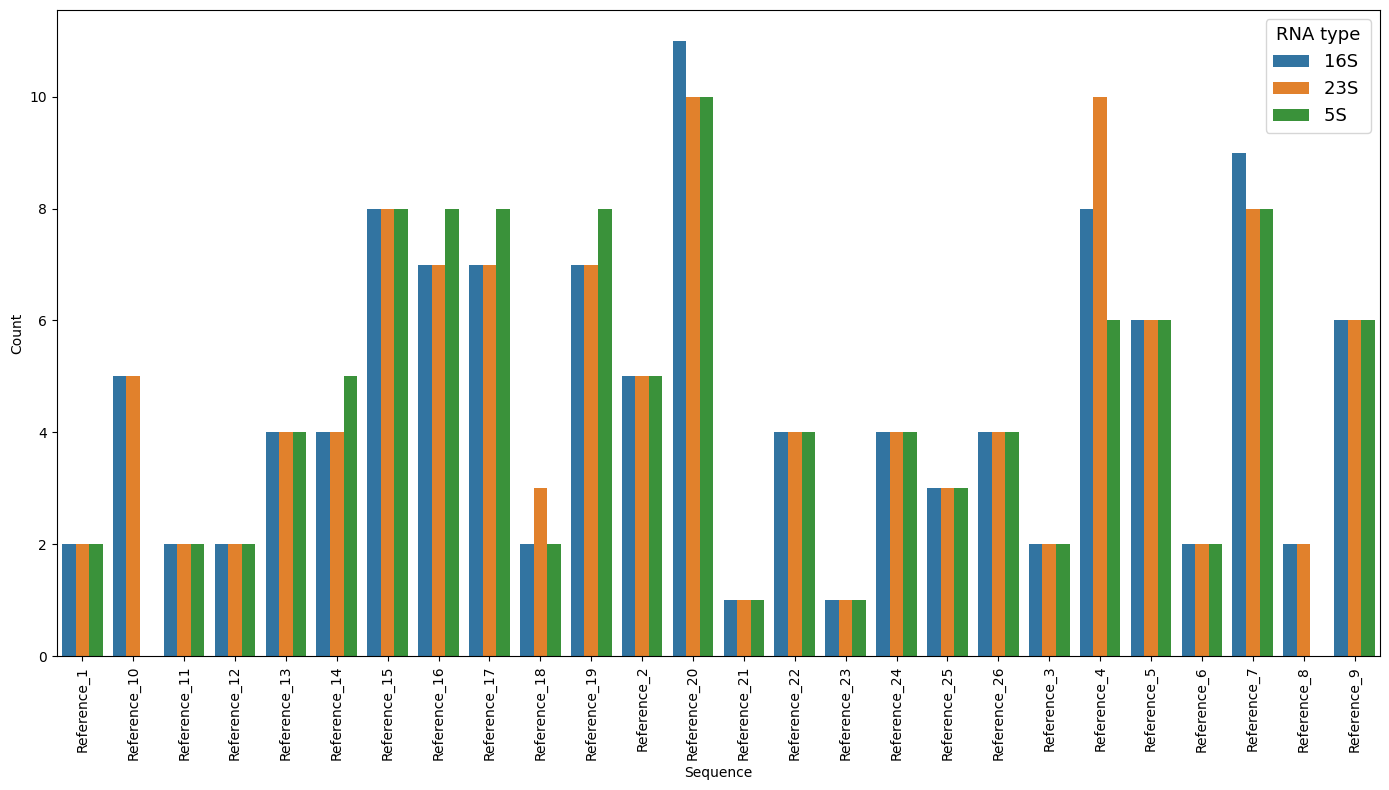

In [8]:
fig, axes = plt.subplots(figsize=(14, 8), tight_layout=True);

sns.barplot(chr_types_rna_count, x='chromosome', y='count', hue='attributes');
plt.xticks(rotation=90);
plt.legend(loc='upper right', prop={'size': 13}, title='RNA type').get_title().set_fontsize('13')
plt.ylabel('Count')
plt.xlabel('Sequence')
plt.tight_layout();

### Aligning like in bedtools!

In [9]:
bed_align = gff.merge(bed, on='chromosome', suffixes=('_x', '_y'))
bed_align = bed_align.loc[(bed_align.start_x >= bed_align.start_y) & (bed_align.end_x <= bed_align.end_y)]
bed_align

,chromosome,source,type,start_x,end_x,score_x,strand_x,phase,attributes,start_y,end_y,name,score_y,strand_y
129,Reference_11,barrnap:0.9,rRNA,924358,925855,0.000000e+00,+,.,16S,923529,930070,NODE_1081_length_6540_cov_836.773323,0,-
156,Reference_11,barrnap:0.9,rRNA,926697,929642,0.000000e+00,+,.,23S,923529,930070,NODE_1081_length_6540_cov_836.773323,0,-
183,Reference_11,barrnap:0.9,rRNA,929827,929936,1.400000e-12,+,.,5S,923529,930070,NODE_1081_length_6540_cov_836.773323,0,-
215,Reference_11,barrnap:0.9,rRNA,2074460,2075957,0.000000e+00,+,.,16S,2073631,2080172,NODE_1081_length_6540_cov_836.773323,0,-
242,Reference_11,barrnap:0.9,rRNA,2076799,2079744,0.000000e+00,+,.,23S,2073631,2080172,NODE_1081_length_6540_cov_836.773323,0,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121855,Reference_14,barrnap:0.9,rRNA,2433040,2433152,2.000000e-12,-,.,5S,2433027,2433434,NODE_6108_length_407_cov_1153.232955,0,+
122182,Reference_14,barrnap:0.9,rRNA,3766952,3767064,2.000000e-12,-,.,5S,3766939,3767346,NODE_6108_length_407_cov_1153.232955,0,+
122583,Reference_25,barrnap:0.9,rRNA,1329370,1329473,2.900000e-10,-,.,5S,1329345,1329810,NODE_5333_length_465_cov_547.609756,0,-
125060,Reference_25,barrnap:0.9,rRNA,1822913,1823016,2.900000e-10,+,.,5S,1822575,1823040,NODE_5333_length_465_cov_547.609756,0,+


## Plot customization 

### Table of genes expression

In [10]:
de = pd.read_table('data/diffexpr_data.tsv.gz')
de

,Sample,logFC,pval,pval_corr,log_pval
0,PNLIP,10.092524,6.590327e-01,1.000000e+00,-0.000000
1,CELA2A,8.691414,5.823905e-01,1.000000e+00,-0.000000
2,CLPS,8.054078,6.517331e-01,1.000000e+00,-0.000000
3,MPO,7.817773,4.483336e-01,1.000000e+00,-0.000000
4,AMY2A,7.285231,6.324412e-01,1.000000e+00,-0.000000
...,...,...,...,...,...
20525,SLC12A1,-7.834589,4.993254e-58,1.025115e-53,52.989227
20526,SEMG2,-8.651953,3.989840e-04,1.000000e+00,-0.000000
20527,MUC7,-9.196481,3.281804e-07,6.737544e-03,2.171498
20528,SEMG1,-9.313028,3.880575e-04,1.000000e+00,-0.000000


### Min and Max values of log fold change

In [11]:
min_x = de.logFC.min()
max_x = de.logFC.max()

min_x, max_x

(-10.661092815248146, 10.092524279930334)

### Creatig new column with annotations of down/up significant/non-significant genes

**This colum was used for coloring**

In [12]:
de.loc[(de.logFC > 0) & (de.log_pval > -np.log10(0.05)), 'down_up'] = 'Significantly upregulated'
de.loc[(de.logFC <= 0) & (de.log_pval > -np.log10(0.05)), 'down_up'] = 'Significantly downregulated'
de.loc[(de.logFC > 0) & (de.log_pval <= -np.log10(0.05)), 'down_up'] = 'Non-significantly upregulated'
de.loc[(de.logFC <= 0) & (de.log_pval <= -np.log10(0.05)), 'down_up'] = 'Non-significantly downregulated'

de.down_up.value_counts()

Non-significantly upregulated      9835
Non-significantly downregulated    5686
Significantly downregulated        2576
Significantly upregulated          2433
Name: down_up, dtype: int64

### Top 2 up- and downregulated genes

In [13]:
top_upreg = de.loc[de.down_up == 'Significantly upregulated'].sort_values(by = "logFC", ascending = False).head(2)
top_upreg

,Sample,logFC,pval,pval_corr,log_pval,down_up
64,ZIC2,4.571915,4.096640e-08,0.000841,3.075183,Significantly upregulated
88,ZIC5,4.276745,3.686245e-09,0.000076,4.121027,Significantly upregulated


In [14]:
top_downreg = de.loc[de.down_up == 'Significantly downregulated'].sort_values(by = "logFC").head(2)
top_downreg

,Sample,logFC,pval,pval_corr,log_pval,down_up
20529,UMOD,-10.661093,3.717350e-57,7.631720e-53,52.117378,Significantly downregulated
20527,MUC7,-9.196481,3.281804e-07,6.737544e-03,2.171498,Significantly downregulated


In [15]:
genes_to_annotate = pd.concat([top_downreg, top_upreg]).iloc[:,[0,1,4]]
genes_to_annotate

,Sample,logFC,log_pval
20529,UMOD,-10.661093,52.117378
20527,MUC7,-9.196481,2.171498
64,ZIC2,4.571915,3.075183
88,ZIC5,4.276745,4.121027


### Finally, the plot!

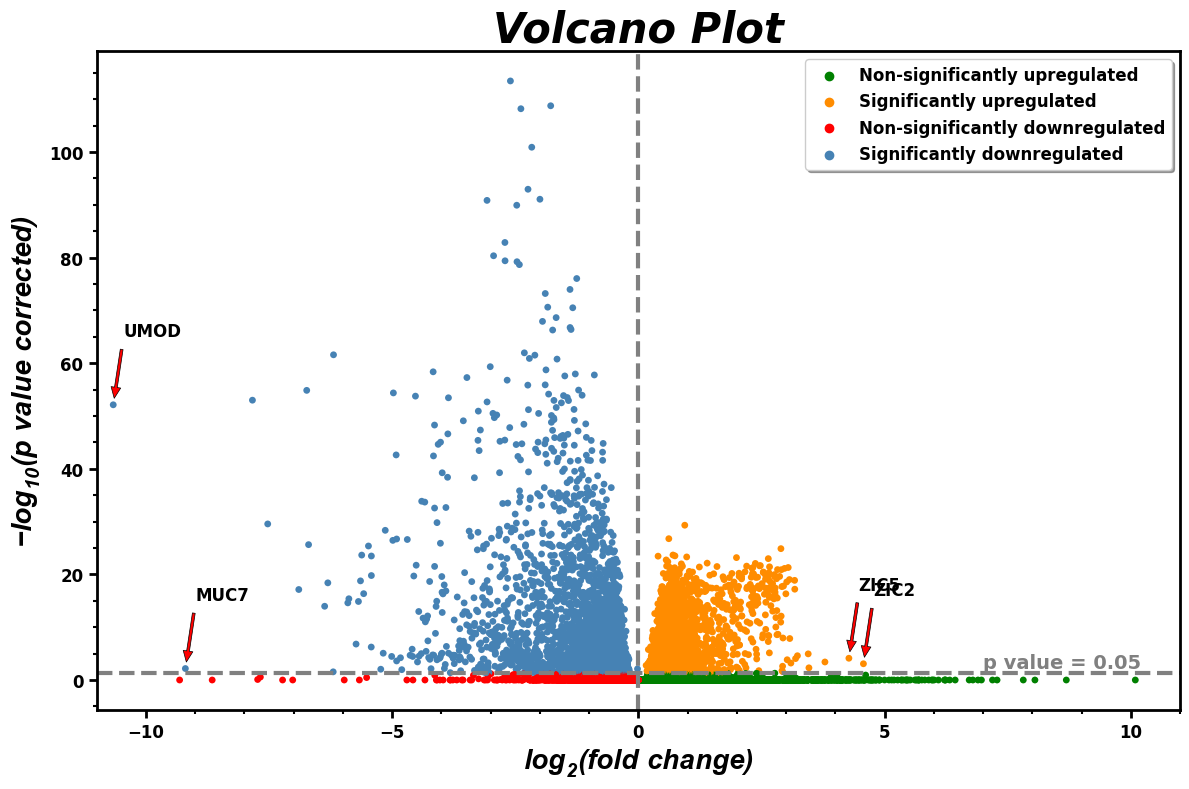

In [16]:
#parameters for bold italic font of math formulas in latex
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.bf'] = 'Arial:italic:bold' #иначе жирным и курсивным латех у меня не становится...(

# initial plotiing
fig, axes = plt.subplots(figsize=(12, 8), tight_layout=True);

sc = sns.scatterplot(data=de, x='logFC', y="log_pval", hue ="down_up", linewidth=0, s=24,
               palette=['green','darkorange', 'red','steelblue']);

# legend
sc.legend(prop={'size':12, 'weight':'bold'}, title=None, shadow=True)

# titles 
axes.set_title('Volcano Plot', fontweight='bold', style='italic', fontsize=30);
axes.set_xlabel(r'$\mathbf{log_2(fold\ change)}$', fontsize=20);
axes.set_ylabel(r"$\mathbf{-log_{10}(p\ value\ corrected)}$", fontsize=20);

# grey lines
plt.axvline(0, linestyle = "--", color='grey', linewidth=3);
plt.axhline(-np.log10(0.05), linestyle = "--", color='grey', linewidth=3);
plt.text(7, -np.log10(0.05) + 1,'p value = 0.05', color='grey', fontweight='bold', fontsize=14)

# setting ticks and spines parameters
for spine in axes.spines.values(): 
    spine.set_linewidth(2)
    
plt.xticks(range(-10,11,5),weight='bold', fontsize=12)
plt.yticks(weight='bold', fontsize=12)
axes.tick_params(which='major', width=2, length=6)
axes.tick_params(which='minor', width=1.5, length=3)
plt.minorticks_on();

#limits of X axis
plt.xlim([math.floor(min_x), math.ceil(max_x)]);

# annotating by arrows
for num_of_gene in range(4): 
    axes.annotate(genes_to_annotate.iloc[num_of_gene].Sample, 
                  xy=(genes_to_annotate.iloc[num_of_gene].logFC, 
                      genes_to_annotate.iloc[num_of_gene].log_pval),
                  xytext=(genes_to_annotate.iloc[num_of_gene].logFC + 0.2, 
                          genes_to_annotate.iloc[num_of_gene].log_pval + 13),
                  weight='bold', fontsize=12,
                  arrowprops=dict(linewidth=0.5, facecolor='red', 
                                  headlength=8, width=2, headwidth=7, shrink=0.1))


# Pie chart

### Preparing data

In [17]:
pop_data = pd.read_csv('data/population_by_country_2020.csv')
pop_data = pop_data.loc[pop_data['Population (2020)']>50000000]
pop_data.head(5)

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,1440297825,0.39 %,5540090,153,9388211,-348399.0,1.7,38,61 %,18.47 %
1,India,1382345085,0.99 %,13586631,464,2973190,-532687.0,2.2,28,35 %,17.70 %
2,United States,331341050,0.59 %,1937734,36,9147420,954806.0,1.8,38,83 %,4.25 %
3,Indonesia,274021604,1.07 %,2898047,151,1811570,-98955.0,2.3,30,56 %,3.51 %
4,Pakistan,221612785,2.00 %,4327022,287,770880,-233379.0,3.6,23,35 %,2.83 %


In [18]:
# copying data for manipulations
pop_copy = pop_data[['Country (or dependency)','Population (2020)']].copy()
pop_total = pop_copy.loc[:,'Population (2020)'].sum()

# names of countries that will be in "Others" (countries with population <= 130000000)
names_of_others = pop_copy.loc[pop_data['Population (2020)'] <= 130000000, 'Country (or dependency)']
names_of_others = names_of_others.reset_index().iloc[:,1];

# total population of "Others" countries
pop_copy.loc[pop_data['Population (2020)'] <= 130000000, 'Country (or dependency)'] = 'Others'
pop_others = pop_copy.loc[pop_copy['Country (or dependency)'] == 'Others', 'Population (2020)'].sum()

# making data with populations of countries + Others for pie chart
row_of_others = pd.DataFrame(data={'Country (or dependency)':['Others'], 'Population (2020)':[pop_others]})
data_for_pie = pd.concat([pop_copy.loc[pop_data['Population (2020)'] >= 130000000], row_of_others]).reset_index().iloc[:,[1,2]]

# names of countries + Others
names_of_countries = data_for_pie['Country (or dependency)']

data_for_pie

,Country (or dependency),Population (2020)
0,China,1440297825
1,India,1382345085
2,United States,331341050
3,Indonesia,274021604
4,Pakistan,221612785
5,Brazil,212821986
6,Nigeria,206984347
7,Bangladesh,164972348
8,Russia,145945524
9,Others,1617162823


### Pie chart!

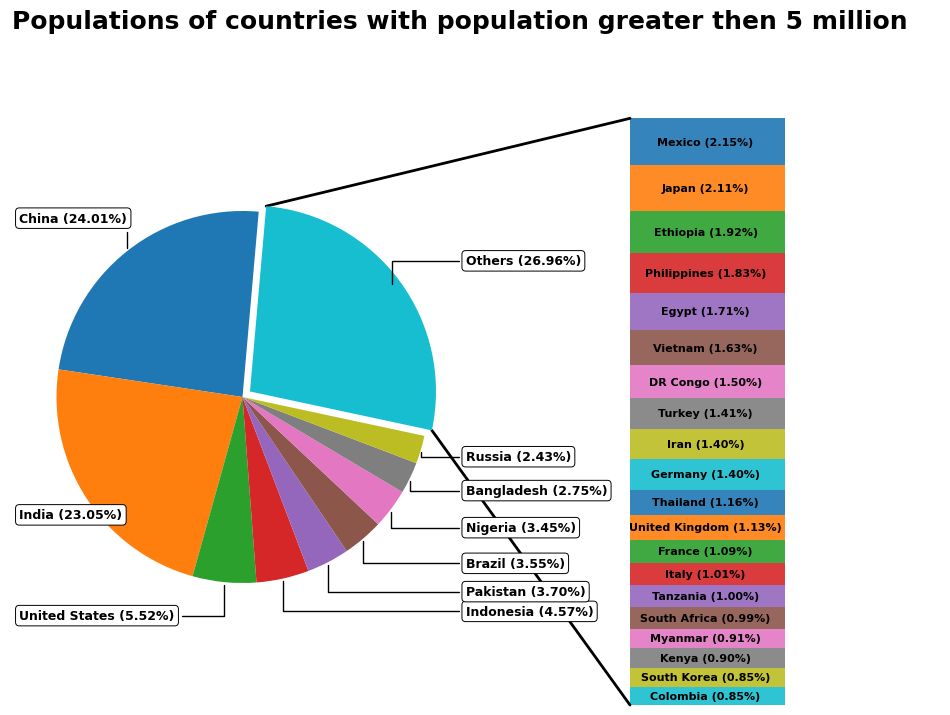

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

ax1.set_zorder(1)
ax2.set_zorder(0)

# PIE
plt.suptitle('Populations of countries with population greater then 5 million', weight='bold', fontsize=18)
fig.subplots_adjust(wspace=0)
angle = 85

wedges, text = ax1.pie(data_for_pie['Population (2020)'],
                    explode = tuple([0]*9+[0.05]), startangle=angle);

theta1, theta2 = wedges[9].theta1, wedges[9].theta2
center, r = wedges[9].center, wedges[9].r

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2 + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    ax1.annotate(f"{names_of_countries[i]} ({data_for_pie.iloc[i,1]/pop_total:.2%})", xy=(x, y), 
                 xytext=(1.2*np.sign(x), 1.2*y), weight='bold', fontsize = 9,
                 arrowprops=dict(linewidth=1, arrowstyle="-", connectionstyle="angle, angleA=0, angleB=90"), 
                 bbox=dict(boxstyle="round", fc="w" , lw=0.7, alpha=1, clip_on=True))

# BARPLOT
bottom = 0
width = 2
ax2.axis('off')
ax2.set_xlim(-1.5 * width, 1.5 * width)



for j, (height, label) in enumerate([*zip(pop_data.loc[pop_data['Population (2020)'] <= 130000000, 
                                                       'Population (2020)'], names_of_others)]):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, label=label, alpha=0.9)
    ax2.bar_label(bc, labels=[f"{names_of_others[j]} ({height/pop_total:.2%}) "], 
                  label_type='center', fontsize=8, weight='bold')

    
#Connection lines
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_linewidth(2)
ax2.add_artist(con)

x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, -pop_others), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
ax2.add_artist(con)
con.set_linewidth(2)

## EDA

In [21]:
covid_df = pd.read_csv('data/owid-covid-data.csv')
covid_df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2/24/2020,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2/25/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2/26/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2/27/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2/28/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220338,ZWE,Africa,Zimbabwe,9/26/2022,257342.0,2.0,36.000,5599.0,0.0,0.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
220339,ZWE,Africa,Zimbabwe,9/27/2022,257376.0,34.0,31.429,5599.0,0.0,0.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
220340,ZWE,Africa,Zimbabwe,9/28/2022,257409.0,33.0,36.143,5602.0,3.0,0.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
220341,ZWE,Africa,Zimbabwe,9/29/2022,257409.0,0.0,21.429,5602.0,0.0,0.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


## Total number of cases of infection on the continents

In [22]:
continent_data = covid_df.loc[covid_df.date =='9/30/2022'].groupby('continent').total_cases.sum().reset_index()

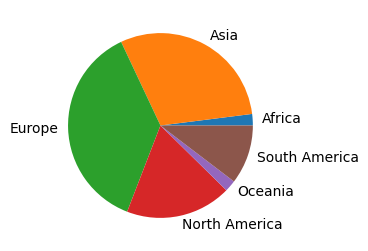

In [23]:
fig, _ = plt.subplots(figsize=(3,3))
plt.pie(x=continent_data.total_cases, labels=continent_data.continent, rotatelabels=False);

**I assume that Africa simply lacks data, as it is a large continent where epidemics often occur. Africa has weak medicine and badly tracks statistics of disease. It is possible to find out the lack of data by looking through the number of cases per inhabitant of the continent: for other continents where medicine is well developed and statistics are well monitored this number will be +- the same (or at least the order)**

In [24]:
continent_data['total_cases divided on population'] = \
continent_data.total_cases/(pd.Series([1427, 4723, 744, 607 ,45, 442])*(10**6))
continent_data

,continent,total_cases,total_cases divided on population
0,Africa,12357230.0,0.008660
1,Asia,185277473.0,0.039229
2,Europe,229320961.0,0.308227
3,North America,114261541.0,0.188240
4,Oceania,12395726.0,0.275461
5,South America,63970223.0,0.144729


**Information about continents population was obtained from internet. Number of cases per inhabitant of the continent in Africa is 1-2 orders of magnitude less than in other continents. Therefore, we can assume the lack of data recived from Africa**

Also some problem with data have Asia. It could be connected with China

In [25]:
countries = covid_df.loc[covid_df.date =='9/30/2022'].groupby('location').total_cases.sum().reset_index()
cases_china = countries.loc[countries.location == "China"].reset_index()
pop_of_china = 1.412*(10**9)
cases_china['cases divided on population'] = cases_china.total_cases/pop_of_china
cases_china

,index,location,total_cases,cases divided on population
0,43,China,991245.0,0.000702


China is the most populated country not only in Asia, but in the world. And such small number of cases is obviously affect this statistic

### First reports about cases

In [26]:
non_zero_cases = covid_df.loc[(pd.notnull(covid_df.total_cases))&
                              (pd.notnull(covid_df.continent))].copy()

dates = pd.to_datetime(non_zero_cases.groupby("location").
                       date.head(1)).sort_values().head(20)

In [27]:
covid_df.loc[pd.to_datetime(covid_df.date.sort_index()).index .isin(dates.index)].sort_values(by='date')

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
117996,MAC,Asia,Macao,1/22/2020,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,84.24,NaN,NaN,NaN,NaN,NaN
195479,THA,Asia,Thailand,1/22/2020,4.0,NaN,NaN,NaN,NaN,NaN,...,1.9,38.8,90.670,2.10,77.15,0.777,NaN,NaN,NaN,NaN
192666,TWN,Asia,Taiwan,1/22/2020,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,80.46,NaN,NaN,NaN,NaN,NaN
40517,CHN,Asia,China,1/22/2020,547.0,NaN,NaN,17.0,NaN,NaN,...,1.9,48.4,NaN,4.34,76.91,0.761,NaN,NaN,NaN,NaN
184109,KOR,Asia,South Korea,1/22/2020,1.0,NaN,NaN,NaN,NaN,NaN,...,6.2,40.9,NaN,12.27,83.03,0.916,NaN,NaN,NaN,NaN
207703,USA,North America,United States,1/22/2020,1.0,NaN,NaN,NaN,NaN,NaN,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
100017,JPN,Asia,Japan,1/22/2020,2.0,NaN,NaN,NaN,NaN,NaN,...,11.2,33.7,NaN,13.05,84.63,0.919,NaN,NaN,NaN,NaN
177151,SGP,Asia,Singapore,1/23/2020,1.0,1.0,NaN,NaN,NaN,NaN,...,5.2,28.3,NaN,2.40,83.62,0.938,NaN,NaN,NaN,NaN
214909,VNM,Asia,Vietnam,1/23/2020,2.0,2.0,NaN,NaN,NaN,NaN,...,1.0,45.9,85.847,2.60,75.40,0.704,NaN,NaN,NaN,NaN
34870,CAN,North America,Canada,1/23/2020,2.0,2.0,NaN,NaN,NaN,NaN,...,12.0,16.6,NaN,2.50,82.43,0.929,NaN,NaN,NaN,NaN


 **It can be assumed that in China the spread of the disease started long before the first reported number of cases in this country. This can be confirmed by comparing the dynamics of new cases in other countries.**